<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Vera_Mendes_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk*prob_drunk_prior)/((prob_positive_drunk*prob_drunk_prior)+(prob_positive)*(1-prob_drunk_prior))

In [5]:
arr1= []
i = 0.001
while i<1:
  arr1.append(i)
  i = prob_drunk_given_positive(i,0.08, 1)
print(arr1)

[0.001, 0.012357884330202669, 0.13525210993291495, 0.6615996951348605, 0.9606895076105054, 0.9967371577896734, 0.9997381867081508, 0.9999790498904363, 0.9999983239589307, 0.9999998659165077, 0.9999999892733192, 0.9999999991418655, 0.9999999999313492, 0.999999999994508, 0.9999999999995607, 0.9999999999999648, 0.9999999999999972, 0.9999999999999998]


In [7]:
a = len(arr1)
a

18

In [0]:
# I created my dataframe with 18 index positions but the last ones were rounded to 1 in the dataframe
# Therefore I chose the values that were not rounded to 1

In [0]:
import pandas as pd
import numpy as np

In [18]:
ind_pos = range(0,9)
arr2= np.array(arr1)
df1=pd.DataFrame({"number of tests": ind_pos, "percentage of likelihood": arr2[ind_pos]})
df1

,number of tests,percentage of likelihood
0,0,0.001000
1,1,0.012358
2,2,0.135252
3,3,0.661600
4,4,0.960690
5,5,0.996737
6,6,0.999738
7,7,0.999979
8,8,0.999998


In [0]:
# Testing stats.bayes_mvs in previous dataset
from scipy import stats

In [74]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-18 23:43:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-09-18 23:43:43 (600 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                        'budget','physician-fee-freeze', 'el-salvador-aid',
                        'religious-groups','anti-satellite-ban',
                        'aid-to-contras','mx-missile','immigration',
                        'synfuels', 'education', 'right-to-sue','crime',
                        'duty-free','south-africa'])

In [0]:
df = df.replace({'?':0, 'n':1, 'y':2})
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [87]:
stats.bayes_mvs(dem.mean(), alpha=0.95)

(Mean(statistic=1.4281367041198503, minmax=(1.297300366607915, 1.5589730416317855)),
 Variance(statistic=0.06956239607577823, minmax=(0.032897927262519853, 0.1444093340936888)),
 Std_dev(statistic=0.25872811744075414, minmax=(0.1813778576963568, 0.3800122815037546)))

In [95]:
mean_confidence_interval, _, _ =stats.bayes_mvs(rep.mean(), alpha=0.95)
print(mean_confidence_interval)

Mean(statistic=1.4464285714285716, minmax=(1.2566888244298873, 1.636168318427256))


In [30]:
# Set Random Seed for number of times tested as per frequentists statistics
np.random.seed(seed=42)

drunk = np.random.binomial(n=1, p=0.92, size=9)
print(drunk)

[1 0 1 1 1 1 1 1 1]


In [31]:
# Frequentists df
df2 = pd.DataFrame({"number of tests": range(0,9), "percentage of likelihood": 
              drunk})
df2

,number of tests,percentage of likelihood
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1


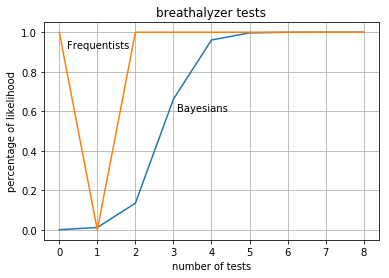

In [36]:
# plot

import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df1['number of tests'],df1['percentage of likelihood'])
ax.plot(df2['number of tests'],df2['percentage of likelihood'])


ax.set(xlabel='number of tests', ylabel='percentage of likelihood',
       title='breathalyzer tests')
ax.grid()
ax.text(x=3.1, y=.6, s="Bayesians", fontsize=10)
ax.text(x=0.2, y=.92, s="Frequentists", fontsize=10)

fig.savefig("test.png")
plt.show()


## Difference between Bayesian and Frequentist statistics 
### Frequentists make predictions on underlying truths of the experiment, they do not use data from outside the experiment.
### Bayesians uses prior knowledge on past similar experiments, they use info outside of the current experiment to make their predictions. This is normally a prior probability.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)